## **Sessa Empirical Estimator**  
### *By Jyreneah Angel and Nicole Grace Joligon* 

## **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from some_module import See_KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import ecdf

## **CONVERSION**

***Import Dataset***

In [66]:
# Load simulated data based on med.events
import pandas as pd

simulated_df = pd.read_csv("../med_events.csv")

# Display the last few rows
print(simulated_df.tail())

      PATIENT_ID        DATE  PERDAY CATEGORY  DURATION
1075         100  07/19/2023       5     medA         7
1076         100  08/22/2024       5     medB        30
1077         100  09/26/2025       5     medA        14
1078         100  10/27/2023       2     medA        14
1079         100  11/30/2024       1     medB        60


***Match R function***

In [67]:
# Rename columns in the dataframe
new_columns = ["pnr", "eksd", "perday", "ATC", "dur_original"]
simulated_df = simulated_df.set_axis(new_columns, axis=1)

# Display the first few rows
simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,1,01/01/2023,1,medB,60
1,1,02/05/2024,5,medA,60
2,1,03/11/2025,1,medB,90
3,1,04/11/2023,3,medB,90
4,1,05/15/2024,1,medB,60


***eksd string to DateTime***

In [68]:
simulated_df['eksd'] = pd.to_datetime(simulated_df['eksd'])

simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,1,2023-01-01,1,medB,60
1,1,2024-02-05,5,medA,60
2,1,2025-03-11,1,medB,90
3,1,2023-04-11,3,medB,90
4,1,2024-05-15,1,medB,60


## **DATA ANALYSIS**

In [69]:
# Count missing values in each column
simulated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pnr           1080 non-null   int64         
 1   eksd          1080 non-null   datetime64[ns]
 2   perday        1080 non-null   int64         
 3   ATC           1080 non-null   object        
 4   dur_original  1080 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 38.0+ KB


In [70]:
# Display DataFrame summary  
simulated_df.isnull().sum()

pnr             0
eksd            0
perday          0
ATC             0
dur_original    0
dtype: int64

In [71]:
# Get summary statistics of the DataFrame
simulated_df.describe(include="all")

,pnr,eksd,perday,ATC,dur_original
count,1080.000000,1080,1080.000000,1080,1080.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,medB,NaN
freq,NaN,NaN,NaN,550,NaN
mean,49.759259,2024-06-23 12:00:00,3.012963,NaN,39.473148
min,1.000000,2023-01-01 00:00:00,1.000000,NaN,7.000000
25%,25.000000,2023-09-27 18:00:00,2.000000,NaN,14.000000
50%,50.000000,2024-06-23 12:00:00,3.000000,NaN,30.000000
75%,74.000000,2025-03-20 06:00:00,4.000000,NaN,60.000000
max,100.000000,2025-12-15 00:00:00,5.000000,NaN,90.000000


***Distribution of 'perday'***

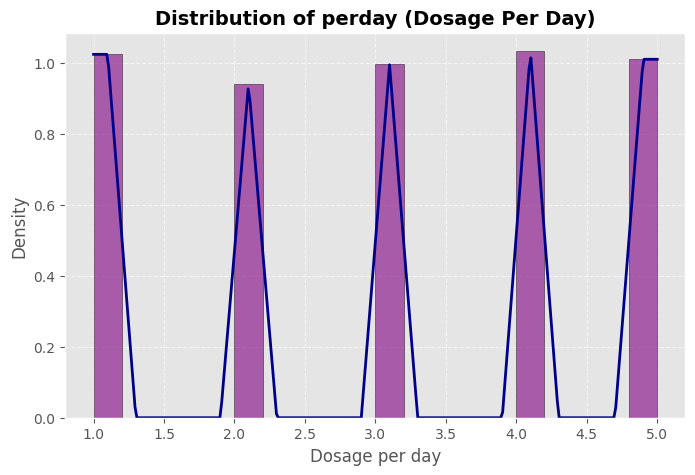

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 5))

counts, bins, _ = ax.hist(simulated_df["perday"], bins=20, color="purple", edgecolor="black", alpha=0.6, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2  # Get center points of bins
smoothed_curve = np.interp(np.linspace(bins[0], bins[-1], 300), bin_centers, counts)

ax.plot(np.linspace(bins[0], bins[-1], 300), smoothed_curve, color="darkblue", linewidth=2)

ax.set_title("Distribution of perday (Dosage Per Day)", fontsize=14, fontweight="bold")
ax.set_xlabel("Dosage per day", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


***Distribution of 'dur_original'***

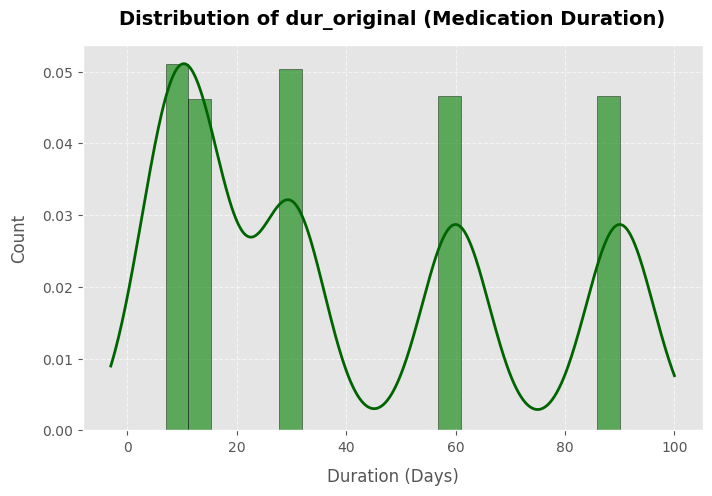

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 5))

data = simulated_df["dur_original"].dropna()

counts, bins, _ = ax.hist(data, bins=20, color="green", edgecolor="black", alpha=0.6, density=True)

kde = gaussian_kde(data, bw_method=0.2)  

x_vals = np.linspace(min(data) - 10, max(data) + 10, 500)
y_vals = kde(x_vals)

y_vals *= max(counts) / max(y_vals)

ax.plot(x_vals, y_vals, color="darkgreen", linewidth=2, linestyle="-")

ax.set_title("Distribution of dur_original (Medication Duration)", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Duration (Days)", fontsize=12, labelpad=10)
ax.set_ylabel("Count", fontsize=12, labelpad=10)
ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


***Count of unique values in 'ATC'***

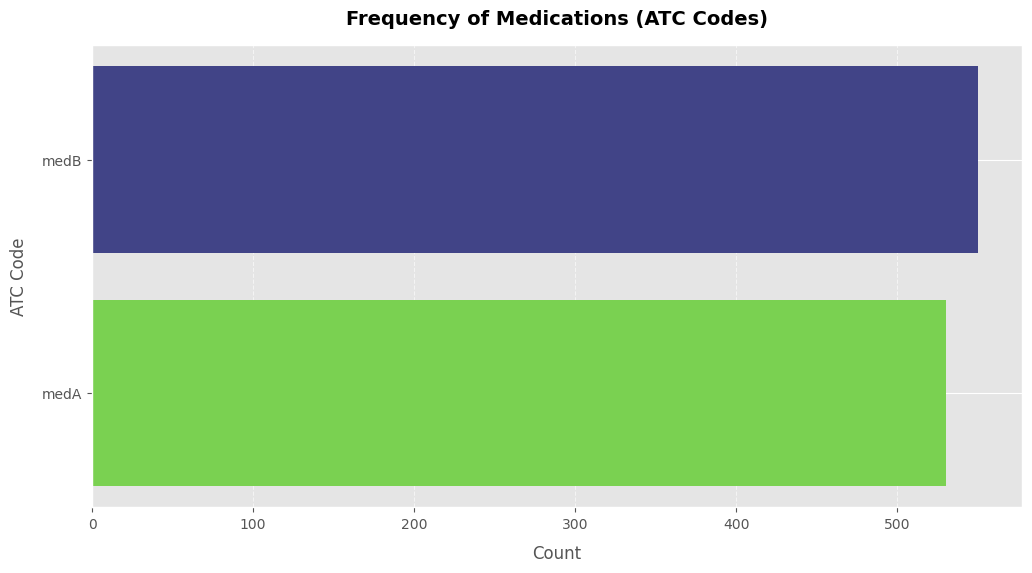

In [74]:
import matplotlib.pyplot as plt

atc_counts = simulated_df["ATC"].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(atc_counts.index, atc_counts.values, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(atc_counts))))

ax.set_title("Frequency of Medications (ATC Codes)", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Count", fontsize=12, labelpad=10)
ax.set_ylabel("ATC Code", fontsize=12, labelpad=10)

ax.invert_yaxis()

ax.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()


***Trend of medication start dates over time***

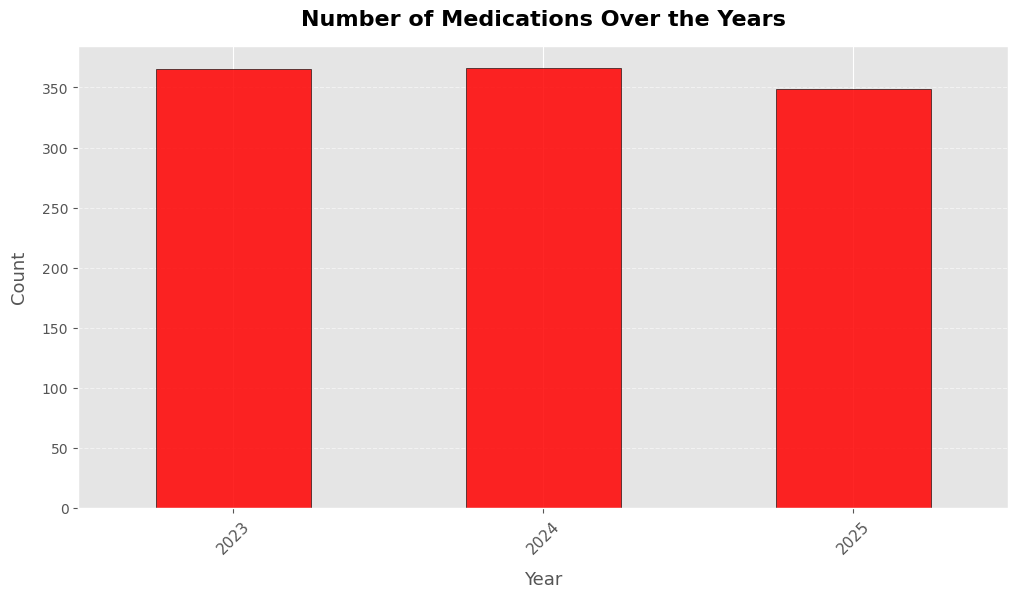

In [75]:
import matplotlib.pyplot as plt

year_counts = simulated_df["eksd"].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))

year_counts.plot(kind="bar", color="red", edgecolor="black", alpha=0.85)

plt.title("Number of Medications Over the Years", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=13, labelpad=10)
plt.ylabel("Count", fontsize=13, labelpad=10)

plt.xticks(rotation=45, fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


***Boxplots***

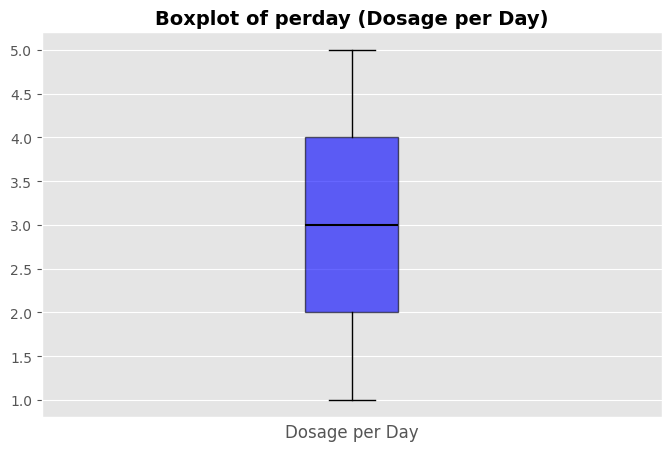

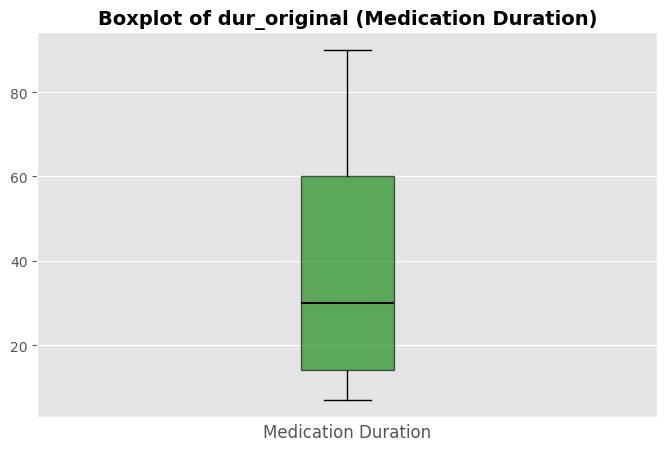

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

ax.boxplot(simulated_df["perday"].dropna(), patch_artist=True, boxprops=dict(facecolor="blue", alpha=0.6), 
           medianprops=dict(color="black", linewidth=1.5), whiskerprops=dict(color="black"), capprops=dict(color="black"))

ax.set_title("Boxplot of perday (Dosage per Day)", fontsize=14, fontweight="bold")
ax.set_xlabel("Dosage per Day", fontsize=12)
ax.set_xticks([])  

plt.show()


fig, ax = plt.subplots(figsize=(8, 5))

ax.boxplot(simulated_df["dur_original"].dropna(), patch_artist=True, boxprops=dict(facecolor="green", alpha=0.6), 
           medianprops=dict(color="black", linewidth=1.5), whiskerprops=dict(color="black"), capprops=dict(color="black"))

ax.set_title("Boxplot of dur_original (Medication Duration)", fontsize=14, fontweight="bold")
ax.set_xlabel("Medication Duration", fontsize=12)
ax.set_xticks([])

plt.show()


***Correlation Heatmap***

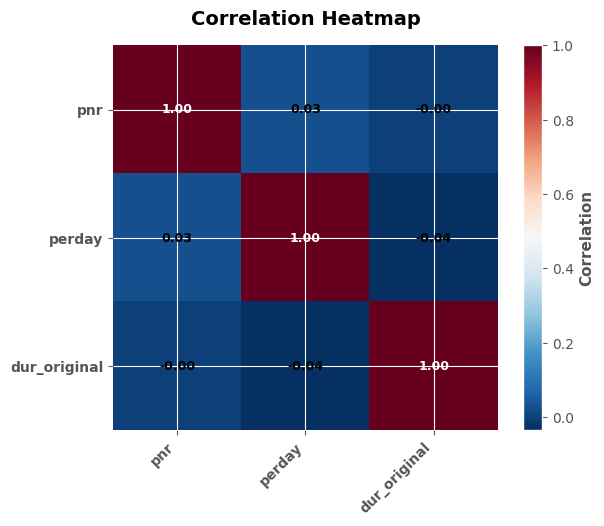

In [77]:
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = simulated_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 5))

cax = ax.imshow(corr_matrix, cmap="RdBu_r", interpolation="nearest")

cbar = plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlation", fontsize=11, fontweight="bold")

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right", fontsize=10, fontweight="bold")
ax.set_yticklabels(corr_matrix.columns, fontsize=10, fontweight="bold")

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        color = "white" if abs(value) > 0.5 else "black" 
        ax.text(j, i, f"{value:.2f}", ha="center", va="center", color=color, fontsize=9, fontweight="bold")

ax.set_title("Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)

ax.spines[:].set_visible(False)

plt.show()


## **SEE using K-Means**

In [113]:
def See_KMeans(arg1, tidy):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    
    # Filter dataset by ATC code
    subset = tidy[tidy['ATC'] == arg1].copy()
    
    # Copy dataset for manipulation
    working_df = subset.copy()
    
    # Sort by 'pnr' and 'eksd', create previous prescription date
    working_df.sort_values(by=['pnr', 'eksd'], inplace=True)
    working_df['prev_eksd'] = working_df.groupby('pnr')['eksd'].shift(1)
    working_df.dropna(subset=['prev_eksd'], inplace=True)
    
    # Randomly sample one row per patient (pnr)
    working_df = working_df.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))
    
    # Calculate event interval in days if eksd is a datetime object
    if np.issubdtype(working_df['eksd'].dtype, np.datetime64):
        working_df['event.interval'] = (working_df['eksd'] - working_df['prev_eksd']).dt.days
    else:
        working_df['event.interval'] = working_df['eksd'] - working_df['prev_eksd']
    working_df['event.interval'] = pd.to_numeric(working_df['event.interval'])
    
    # Compute empirical CDF
    sorted_intervals = np.sort(working_df['event.interval'].values)
    yvals = np.arange(1, len(sorted_intervals) + 1) / len(sorted_intervals)
    dfper = pd.DataFrame({'x': sorted_intervals, 'y': yvals})
    dfper_80 = dfper[dfper['y'] <= 0.8]
    ni = dfper_80['x'].max()
    
    # Frequency of 'pnr'
    pnr_counts = working_df['pnr'].value_counts()
    print("Frequency of pnr:")
    print(pnr_counts)
    
    # Display event interval statistics
    print("\nEvent Interval Statistics:")
    print(working_df['event.interval'].describe())
    
    # Plot ECDFs (80% and 100%)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(dfper_80['x'], dfper_80['y'])
    plt.title("80% ECDF")
    plt.xlabel("event.interval")
    plt.ylabel("ECDF")
    
    plt.subplot(1, 2, 2)
    plt.scatter(dfper['x'], dfper['y'])
    plt.title("100% ECDF")
    plt.xlabel("event.interval")
    plt.ylabel("ECDF")
    plt.show()
    
    # Plot frequency of 'pnr'
    pnr_counts.plot(kind='bar', figsize=(16, 6), title="Frequency of pnr")
    plt.xlabel("pnr")
    plt.ylabel("Count")
    plt.show()
    
    # Filter intervals within 80% threshold
    filtered_df = working_df[working_df['event.interval'] <= ni].copy()
    
    # Log transformation and density estimation
    log_intervals = np.log(filtered_df['event.interval'].values)
    kde = gaussian_kde(log_intervals)
    x1 = np.linspace(log_intervals.min(), log_intervals.max(), 100)
    y1 = kde(x1)
    
    # Plot density of log(event.interval)
    plt.plot(x1, y1)
    plt.title("Density of log(event.interval)")
    plt.xlabel("log(event.interval)")
    plt.ylabel("Density")
    plt.show()
    
    # Scale data for clustering
    scaled_data = StandardScaler().fit_transform(pd.DataFrame({'x': x1, 'y': y1}))
    
    # Determine best k for KMeans
    best_k, best_score = 2, -1
    for k in range(2, min(10, len(scaled_data)) + 1):
        km = KMeans(n_clusters=k, random_state=1234).fit(scaled_data)
        score = silhouette_score(scaled_data, km.labels_)
        if score > best_score:
            best_k, best_score = k, score
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=best_k, random_state=1234).fit(dfper[['x']])
    dfper['cluster'] = kmeans.labels_
    dfper['log_x'] = np.log(dfper['x'])
    
    # Cluster statistics
    summary = dfper.groupby('cluster')['log_x'].agg(['min', 'max', 'median']).reset_index()
    summary[['min', 'max']] = summary[['min', 'max']].replace(-np.inf, 0)
    summary[['Minimum', 'Maximum', 'Median']] = np.exp(summary[['min', 'max', 'median']])
    summary = summary[summary['Median'] > 0]
    
    # Assign cluster to working_df
    working_df['key'] = 1
    summary['key'] = 1
    merged_df = pd.merge(working_df, summary, on='key')
    merged_df['Final_cluster'] = np.where(
        (merged_df['event.interval'] >= merged_df['Minimum']) & (merged_df['event.interval'] <= merged_df['Maximum']),
        merged_df['cluster'],
        np.nan
    )
    results = merged_df.dropna(subset=['Final_cluster'])[['pnr', 'Median', 'cluster']]
    
    # Determine top cluster
    top_cluster = results['cluster'].value_counts().idxmax() if not results.empty else 0
    top_median = results[results['cluster'] == top_cluster]['Median'].iloc[0] if not results.empty else np.nan
    
    # Merge cluster data back
    working_df = pd.merge(working_df, results, on='pnr', how='left')
    working_df['Median'].fillna(top_median, inplace=True)
    working_df['cluster'].fillna(0, inplace=True)
    
    # Merge with original dataset
    final_df = pd.merge(subset, working_df[['pnr', 'Median', 'cluster']], on='pnr', how='left')
    final_df['Median'].fillna(top_median, inplace=True)
    final_df['cluster'].fillna(0, inplace=True)
    
    return final_df

## **SEE using DBSCAN** ##

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.stats import gaussian_kde

def See_DBSCAN(arg1, tidy):
    # Filter rows where ATC equals arg1
    C09CA01 = tidy[tidy['ATC'] == arg1].copy()
    
    # Make working copies
    Drug_see_p0 = C09CA01.copy()
    Drug_see_p1 = C09CA01.copy()
    
    # Sort and create a lag column
    Drug_see_p1.sort_values(by=['pnr', 'eksd'], inplace=True)
    Drug_see_p1['prev_eksd'] = Drug_see_p1.groupby('pnr')['eksd'].shift(1)
    Drug_see_p1.dropna(subset=['prev_eksd'], inplace=True)
    
    # Sample one row per pnr group
    Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))
    Drug_see_p1 = Drug_see_p1[['pnr', 'eksd', 'prev_eksd']]
    
    # Compute event interval
    Drug_see_p1['event.interval'] = (Drug_see_p1['eksd'] - Drug_see_p1['prev_eksd']).dt.days
    Drug_see_p1.dropna(subset=['event.interval'], inplace=True)
    Drug_see_p1['event.interval'] = Drug_see_p1['event.interval'].astype(int)
    
    # Compute ECDF
    sorted_intervals = np.sort(Drug_see_p1['event.interval'].values)
    n = len(sorted_intervals)
    yvals = np.arange(1, n + 1) / n
    dfper = pd.DataFrame({'x': sorted_intervals, 'y': yvals})
    
    # Retain lower 80% of ECDF
    dfper_80 = dfper[dfper['y'] <= 0.8].copy()
    ni = dfper_80['x'].max()
    
    # ECDF Plots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(dfper_80['x'], dfper_80['y'], marker='o', linestyle='-')
    axs[0].set_title("80% ECDF")
    axs[0].set_xlabel("event.interval")
    axs[0].set_ylabel("ECDF")
    axs[1].plot(dfper['x'], dfper['y'], marker='o', linestyle='-')
    axs[1].set_title("100% ECDF")
    axs[1].set_xlabel("event.interval")
    axs[1].set_ylabel("ECDF")
    plt.tight_layout()
    plt.show()
    
    # Frequency of pnr
    Drug_see_p1['pnr'].value_counts().plot(kind='bar', title="Frequency of pnr", figsize=(16, 6))
    plt.xlabel("pnr")
    plt.ylabel("Count")
    plt.show()
    
    # Subset data
    Drug_see_p2 = Drug_see_p1[Drug_see_p1['event.interval'] <= ni].copy()
    
    # Density Estimation on Log(event.interval)
    log_intervals = np.log(Drug_see_p2['event.interval'].values)
    kde = gaussian_kde(log_intervals)
    x1 = np.linspace(log_intervals.min(), log_intervals.max(), 100)
    y1 = kde(x1)
    plt.plot(x1, y1)
    plt.title("Density of log(event.interval)")
    plt.xlabel("log(event.interval)")
    plt.ylabel("Density")
    plt.show()
    
    # DBSCAN Clustering
    X = dfper[['x']].values
    X_scaled = StandardScaler().fit_transform(X)
    
    best_eps, best_score = None, -1
    for eps in np.linspace(0.1, 2.0, 20):
        db = DBSCAN(eps=eps, min_samples=5)
        labels = db.fit_predict(X_scaled)
        if len(set(labels)) - (1 if -1 in labels else 0) < 2:
            continue
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score, best_eps = score, eps
    
    best_eps = best_eps or 0.5
    db_final = DBSCAN(eps=best_eps, min_samples=5)
    dfper['cluster'] = db_final.fit_predict(X_scaled)
    dfper['cluster'].replace(-1, 0, inplace=True)
    
    # Merge cluster results
    Drug_see_p1 = Drug_see_p1.merge(dfper[['x', 'cluster']], left_on='event.interval', right_on='x', how='left')
    Drug_see_p1.drop(columns=['x'], inplace=True)
    Drug_see_p1['cluster'].fillna(0, inplace=True)
    
    # Merge back with original data
    Drug_see_p0 = Drug_see_p0.merge(Drug_see_p1[['pnr', 'cluster']], on='pnr', how='left')
    Drug_see_p0['cluster'].fillna(0, inplace=True)
    
    return Drug_see_p0

## **SEE Aussumption** ##

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def see_assumption(arg1):
    # Ensure data is sorted by 'pnr' and 'eksd'
    arg1 = arg1.sort_values(by=['pnr', 'eksd']).copy()

    # Create lag column 'prev_eksd' for each patient group
    arg1['prev_eksd'] = arg1.groupby('pnr')['eksd'].shift(1)

    # Create a sequential prescription number for each patient (starting at 1)
    arg1['p_number'] = arg1.groupby('pnr').cumcount() + 1

    # Filter to keep only rows where p_number is 2 or higher
    Drug_see2 = arg1[arg1['p_number'] >= 2].copy()

    # Select only the needed columns
    Drug_see2 = Drug_see2[['pnr', 'eksd', 'prev_eksd', 'p_number']]

    # Calculate Duration as the difference in days between eksd and prev_eksd
    Drug_see2['Duration'] = (Drug_see2['eksd'] - Drug_see2['prev_eksd']).dt.days

    # Convert p_number to a categorical type
    Drug_see2['p_number'] = Drug_see2['p_number'].astype(str)

    # Create a boxplot of Duration versus p_number using matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    unique_p_numbers = sorted(Drug_see2['p_number'].unique(), key=int)
    data = [Drug_see2.loc[Drug_see2['p_number'] == p, 'Duration'].values for p in unique_p_numbers]
    ax.boxplot(data, labels=unique_p_numbers)
    ax.set_xlabel("p_number")
    ax.set_ylabel("Duration")
    ax.set_title("Boxplot of Duration by p_number")

    # Compute the median duration for each patient (pnr)
    medians_of_medians = (
        Drug_see2.groupby('pnr')['Duration']
        .median()
        .reset_index(name='median_duration')
    )

    # Plot a horizontal dashed red line for overall median of medians
    overall_median = medians_of_medians['median_duration'].median()
    ax.axhline(y=overall_median, color='red', linestyle='dashed', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return fig




## **SIMULATE**

***Sessa Empirical Estimator using K Means***

**A. ATC = medA**

<ipython-input-113-0de291c15b92>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  working_df = working_df.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


Frequency of pnr:
pnr
1      1
76     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 99, dtype: int64

Event Interval Statistics:
count     99.000000
mean     202.020202
std      151.172154
min      100.000000
25%      100.000000
50%      100.000000
75%      300.000000
max      900.000000
Name: event.interval, dtype: float64


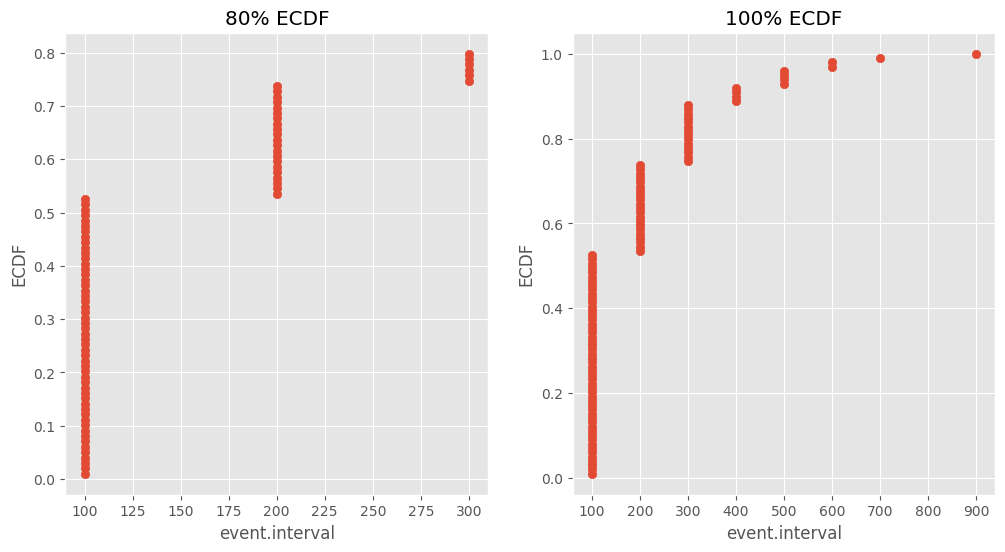

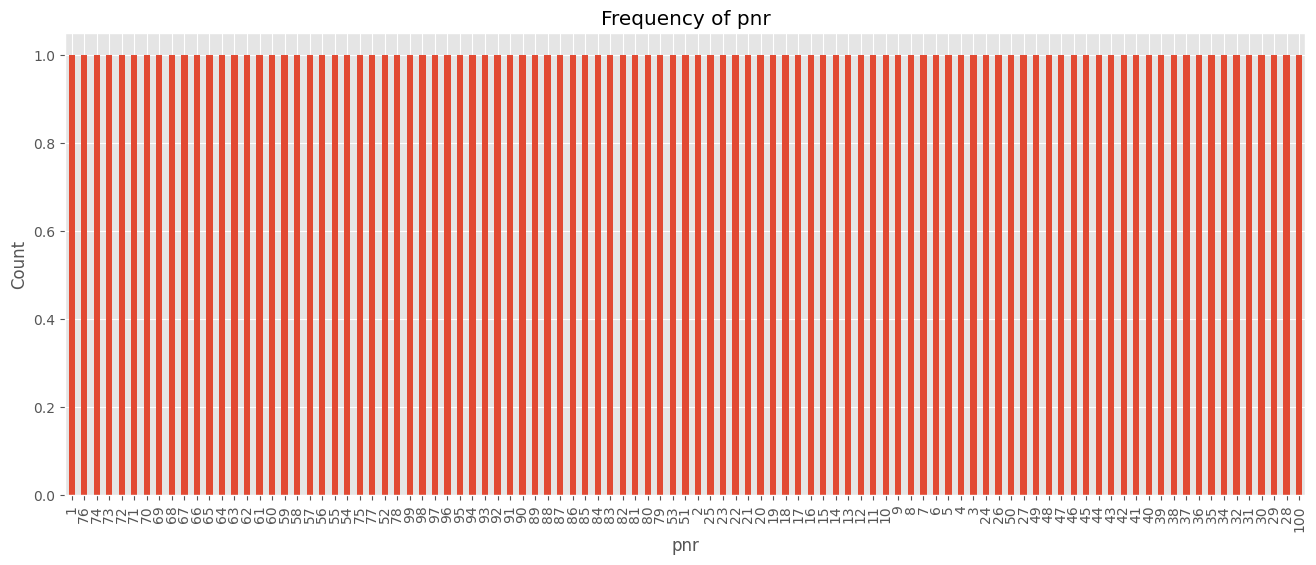

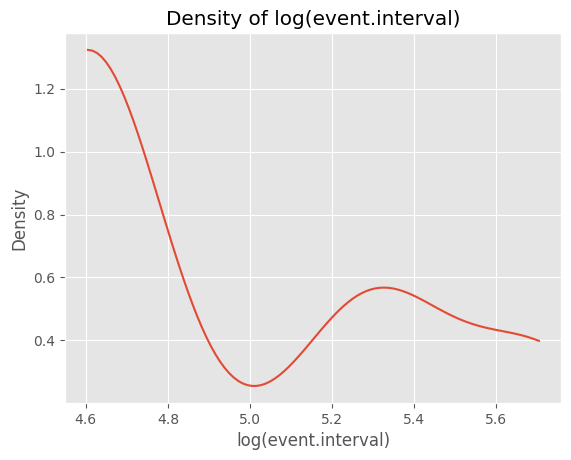

<ipython-input-113-0de291c15b92>:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  working_df['Median'].fillna(top_median, inplace=True)
<ipython-input-113-0de291c15b92>:124: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,pnr,eksd,perday,ATC,dur_original,Median,cluster
0,1,2024-02-05,5,medA,60,100.0,0.0
1,1,2025-06-19,1,medA,7,100.0,0.0
2,1,2023-07-20,3,medA,90,100.0,0.0
3,1,2024-08-23,3,medA,30,100.0,0.0
4,1,2025-09-27,1,medA,7,100.0,0.0


In [114]:
medA_see_kmc = See_KMeans('medA', simulated_df)

medA_see_kmc.head()


**B. ATC = medB**

<ipython-input-113-0de291c15b92>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  working_df = working_df.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


Frequency of pnr:
pnr
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64

Event Interval Statistics:
count    100.000000
mean     202.000000
std      133.318181
min      100.000000
25%      100.000000
50%      200.000000
75%      300.000000
max      700.000000
Name: event.interval, dtype: float64


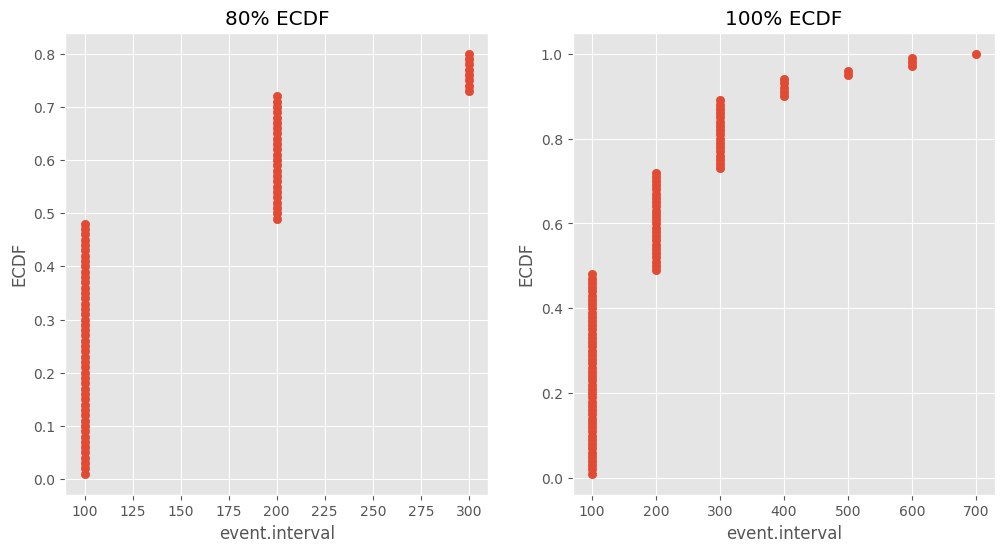

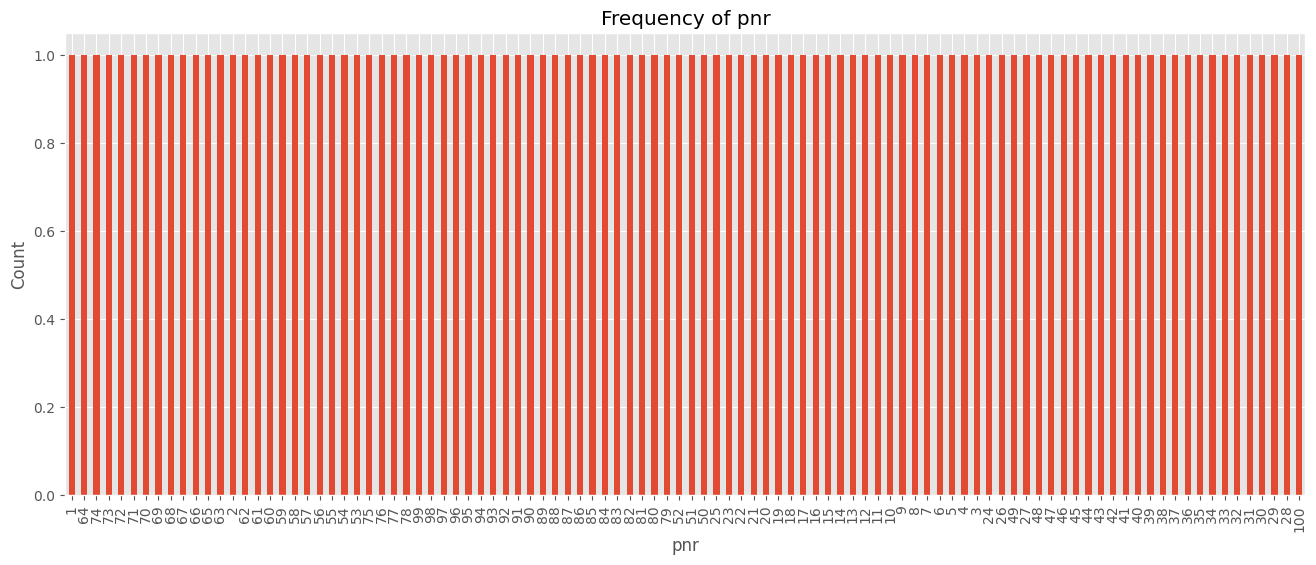

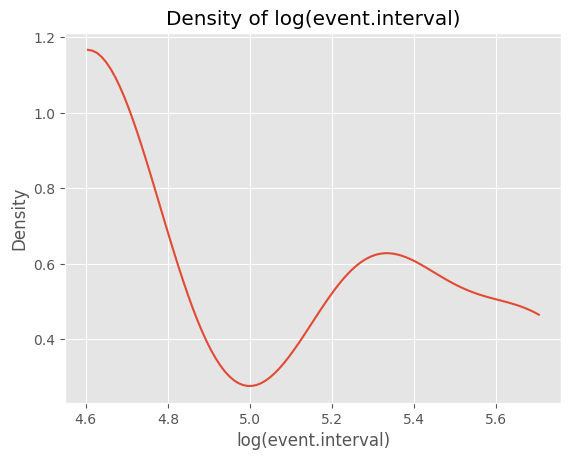

<ipython-input-113-0de291c15b92>:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  working_df['Median'].fillna(top_median, inplace=True)
<ipython-input-113-0de291c15b92>:124: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,pnr,eksd,perday,ATC,dur_original,Median,cluster
0,1,2023-01-01,1,medB,60,300.0,0.0
1,1,2025-03-11,1,medB,90,300.0,0.0
2,1,2023-04-11,3,medB,90,300.0,0.0
3,1,2024-05-15,1,medB,60,300.0,0.0
4,1,2024-12-01,5,medB,90,300.0,0.0


In [115]:
medB_see_kmc = See_KMeans('medB', simulated_df)

medB_see_kmc.head()

***Sessa Empirical Estimator using DBSCAN***

**A. ATC = medA**

<ipython-input-118-620cfef64a11>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


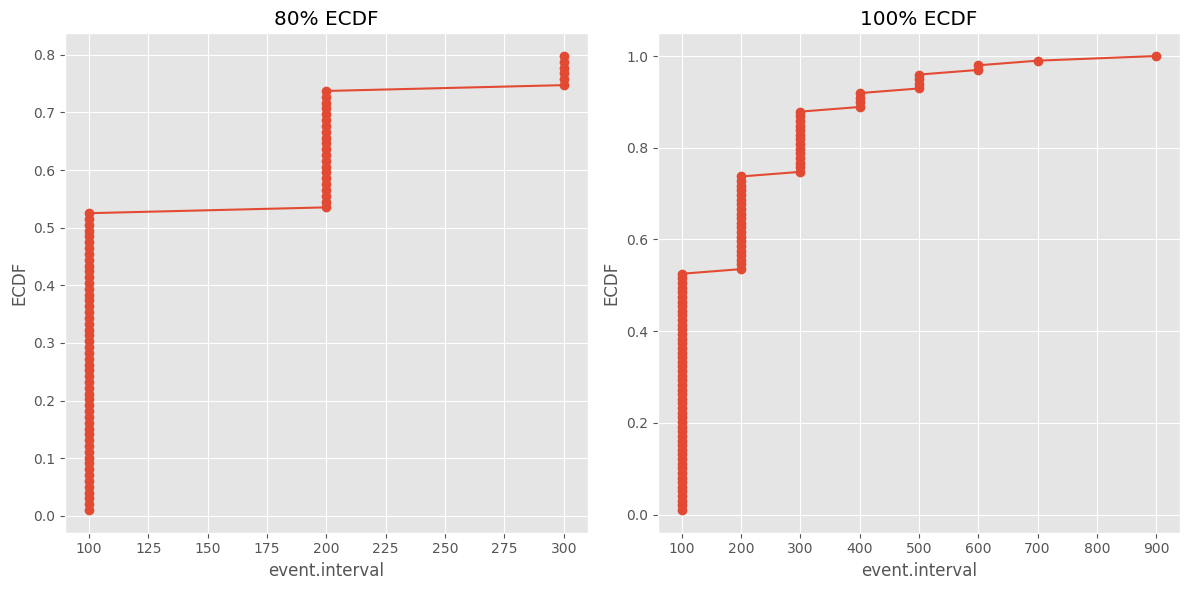

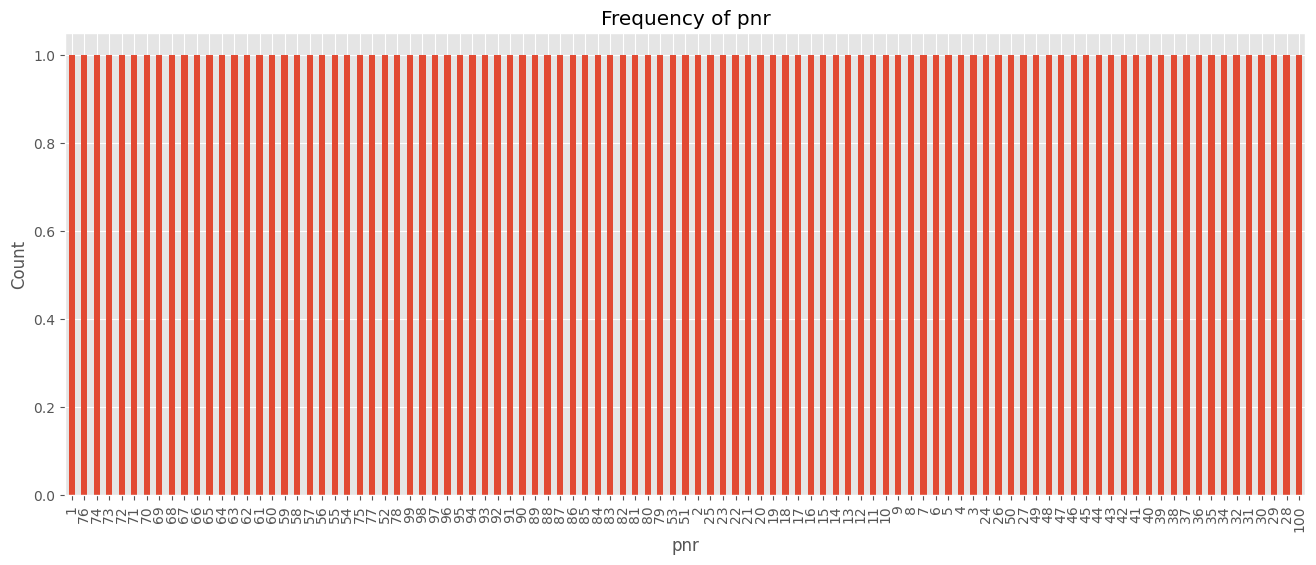

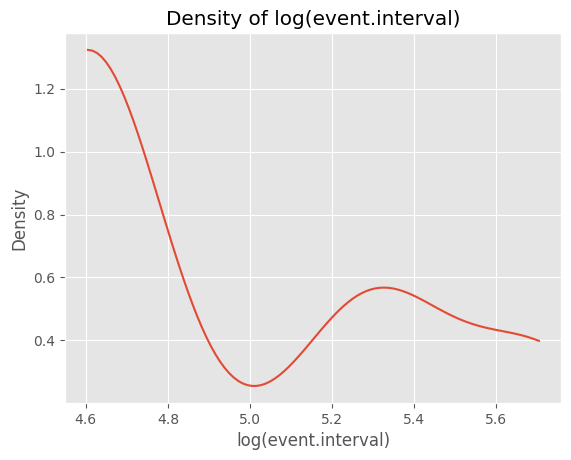

<ipython-input-118-620cfef64a11>:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfper['cluster'].replace(-1, 0, inplace=True)
<ipython-input-118-620cfef64a11>:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,pnr,eksd,perday,ATC,dur_original,cluster
0,1,2024-02-05,5,medA,60,0.0
1,1,2024-02-05,5,medA,60,0.0
2,1,2024-02-05,5,medA,60,0.0
3,1,2024-02-05,5,medA,60,0.0
4,1,2024-02-05,5,medA,60,0.0
...,...,...,...,...,...,...
18616,100,2023-10-27,2,medA,14,0.0
18617,100,2023-10-27,2,medA,14,0.0
18618,100,2023-10-27,2,medA,14,0.0
18619,100,2023-10-27,2,medA,14,0.0


In [119]:
medA_see_dbscan = See_DBSCAN('medA', simulated_df)

medA_see_dbscan

**B. ATC = medB**

<ipython-input-118-620cfef64a11>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


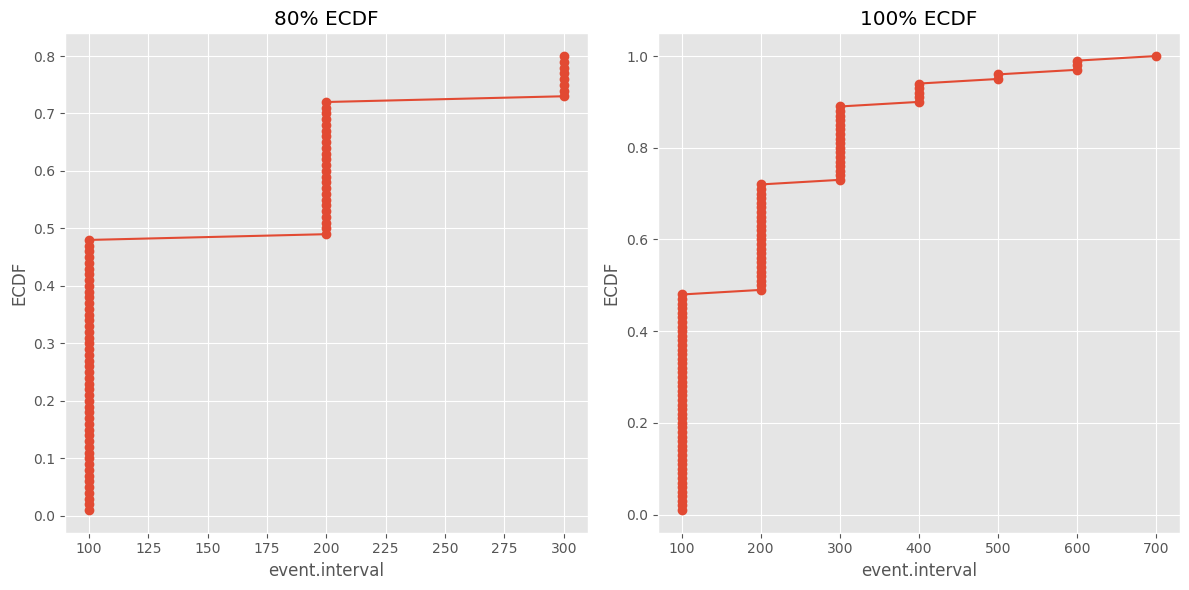

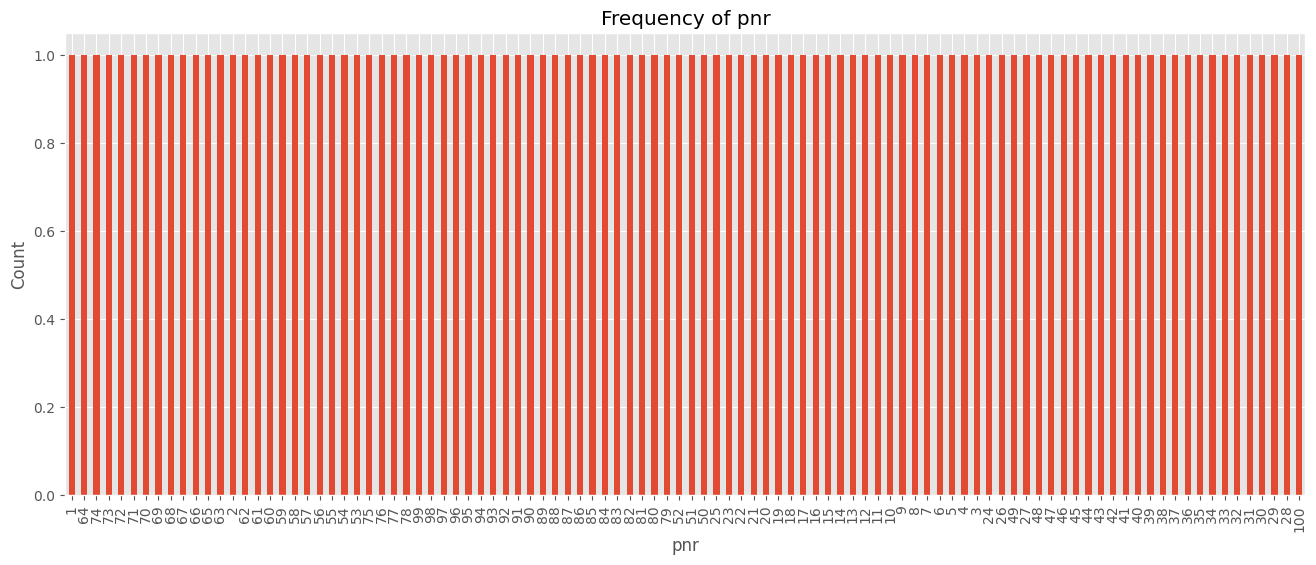

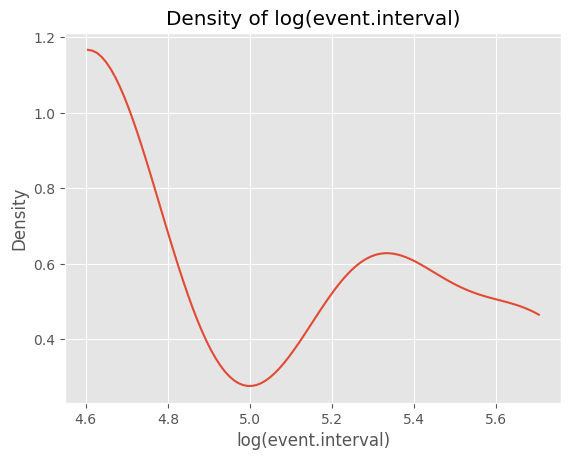

<ipython-input-118-620cfef64a11>:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfper['cluster'].replace(-1, 0, inplace=True)
<ipython-input-118-620cfef64a11>:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,pnr,eksd,perday,ATC,dur_original,cluster
0,1,2023-01-01,1,medB,60,0
1,1,2023-01-01,1,medB,60,0
2,1,2023-01-01,1,medB,60,0
3,1,2023-01-01,1,medB,60,0
4,1,2023-01-01,1,medB,60,0


In [120]:

medB_see_dbscan = See_DBSCAN('medB', simulated_df)

medB_see_dbscan.head()

## **Assumption for SEE using K Means** ##

**A. ATC = medA**

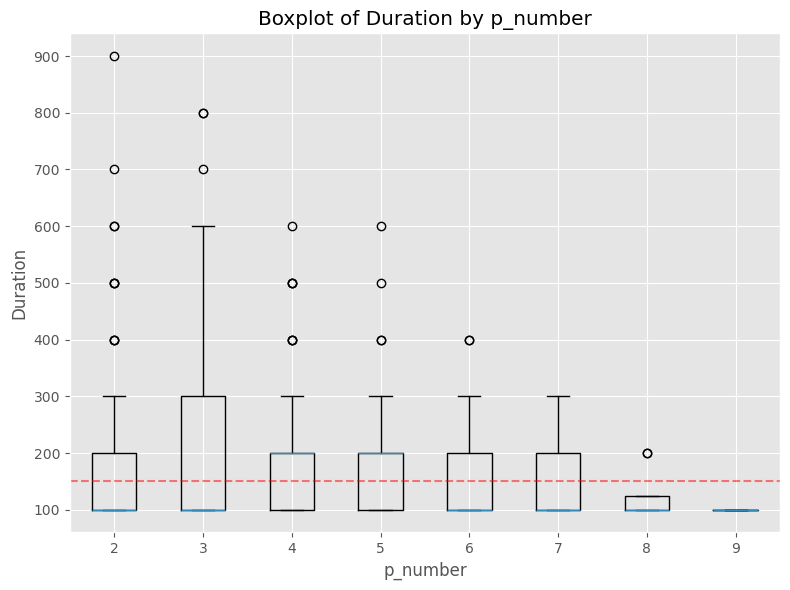

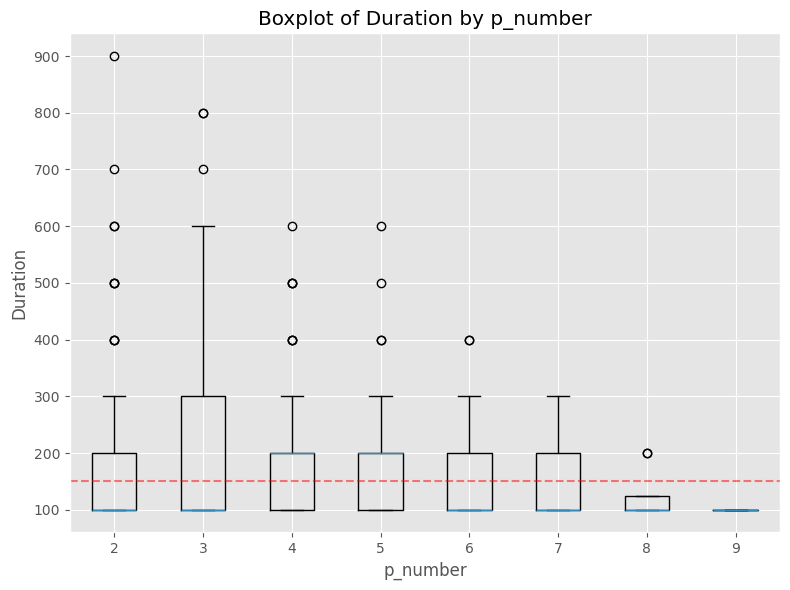

In [126]:
see_assumption(medA_see_kmc)

**B. ATC = medB**

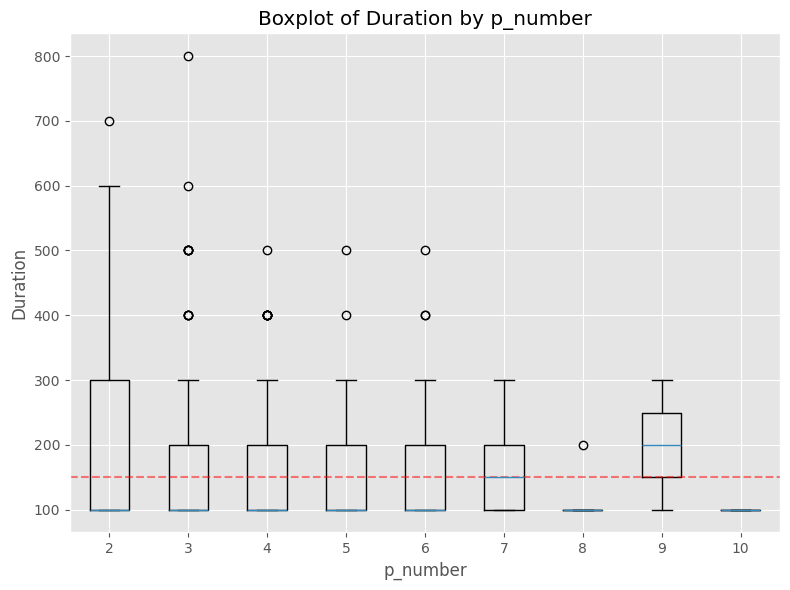

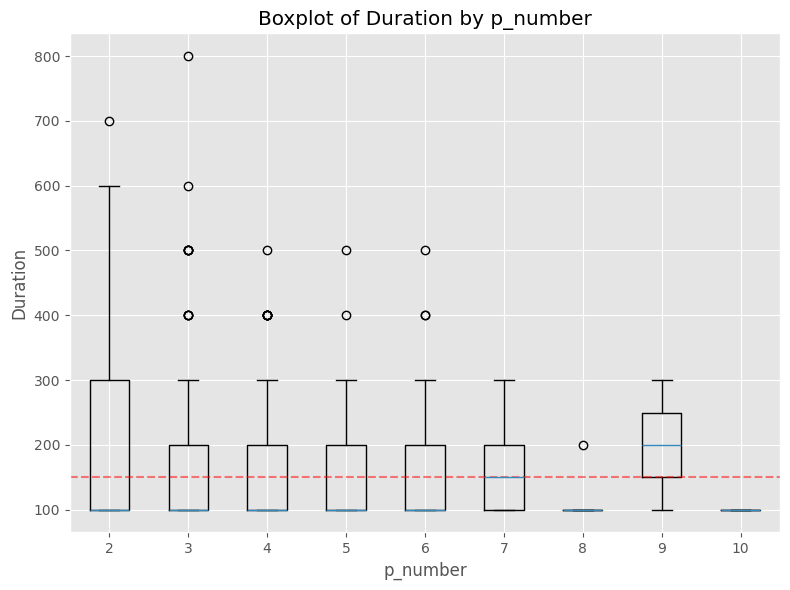

In [127]:
see_assumption(medB_see_kmc)

## **Assumption for SEE using DBSCAN** ##

**A. ATC = medA**

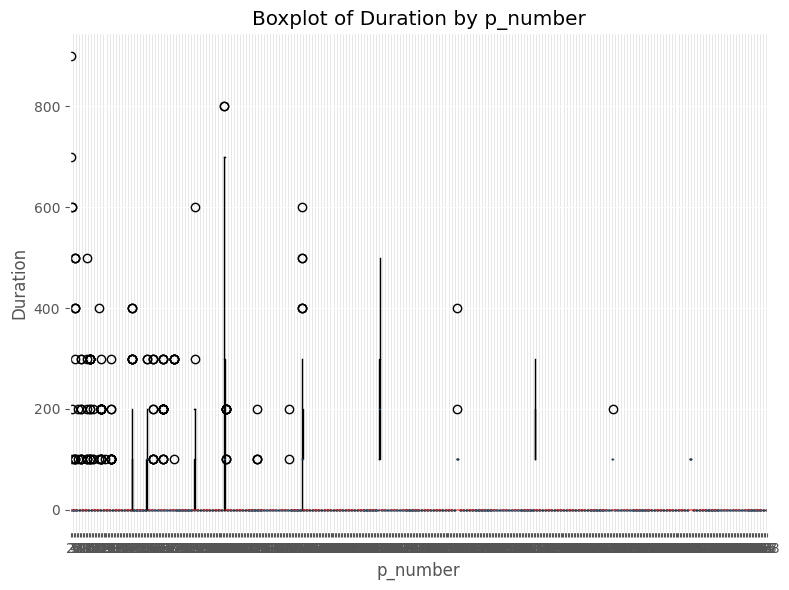

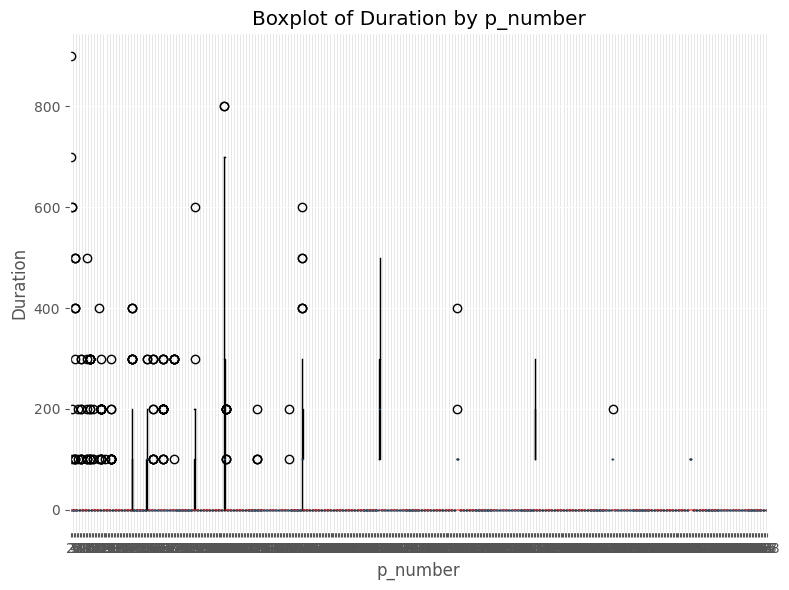

In [128]:
see_assumption(medA_see_dbscan)

**B. ATC = medB**

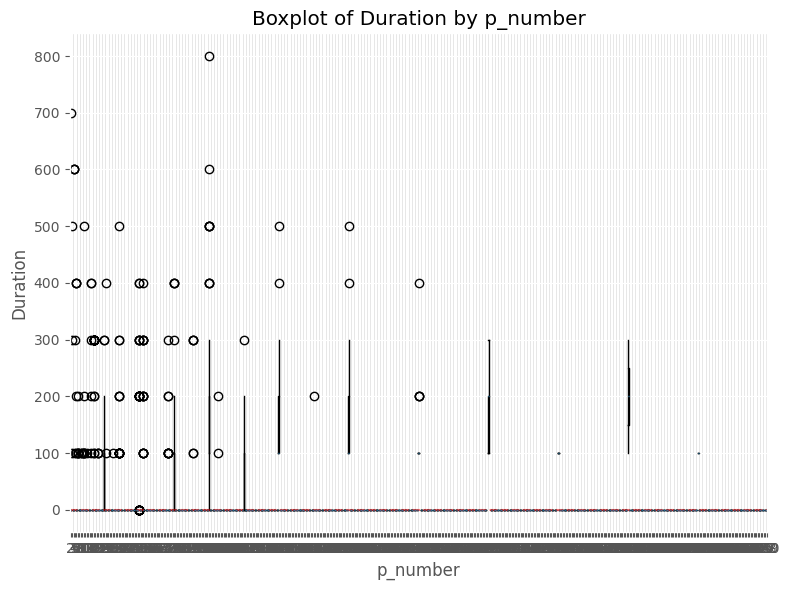

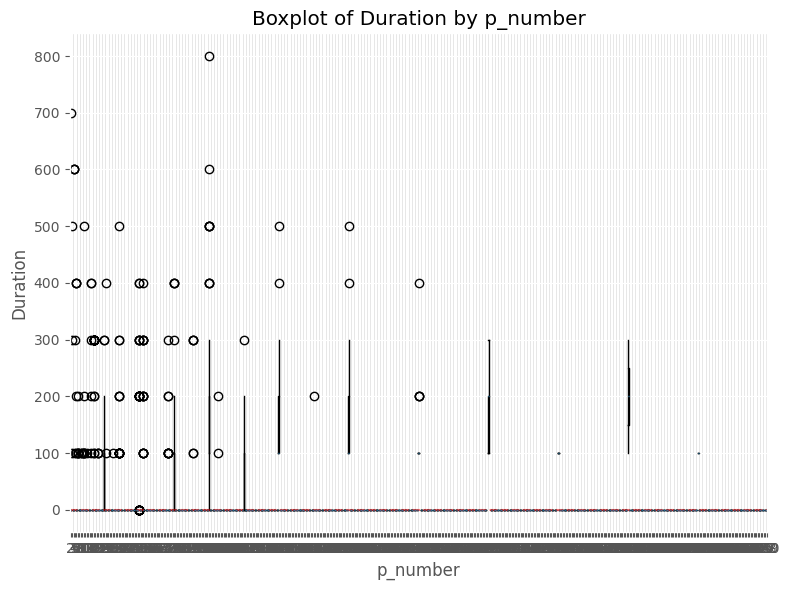

In [129]:
see_assumption(medB_see_dbscan)